In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.distributions import Normal
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gym import Env, spaces
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('../../dataset/final/merged_dataset_final_all_pp.csv')

In [3]:
df.drop(columns='palika_num', inplace=True)
df.drop(columns='district', inplace=True)
df.drop(columns='province', inplace=True)
df.drop(columns='palika', inplace=True)




In [4]:
# # ---------------------------
# # Load your data (replace with actual df)
# # ---------------------------
# # df = pd.read_csv('your_file.csv')
# from sklearn.model_selection import train_test_split
# # Drop problematic columns

# # Define state (soil features) and action (fertilizers)
# soil_cols = ['ph','organic_matter','total_nitrogen','potassium','p2o5','boron','zinc',
#              'sand','clay','slit','parentsoil','crop','variety']
# fert_cols = ['UREA1','UREA2','UREA3','DAP','MOP','organic','boron_fert']

# # Fill missing values
# for col in soil_cols:
#     df[col].fillna(df[col].mean(), inplace=True)

# for col in fert_cols:
#     df[col].fillna(0, inplace=True)
# X = df[soil_cols]
# y = df[fert_cols]
# # Take only 5000 samples
# df_sample = df.sample(n=5000, random_state=42).reset_index(drop=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train[soil_cols] = scaler.fit_transform(X_train[soil_cols])  # fit on train only
# X_test[soil_cols] = scaler.transform(X_test[soil_cols]) 


In [5]:
# # Environment
# # ---------------------------
# class FertilizerEnv:
#     def __init__(self, data):
#         self.data = data.reset_index(drop=True)
#         self.n_steps = len(data)
#         self.n_features = data.shape[1]
#         self.max_fertilizer = np.array([100, 100, 100, 50, 50, 5, 5], dtype=np.float32)
#         self.current_idx = 0

#     def reset(self):
#         self.current_idx = 0
#         return self.data.iloc[self.current_idx].values.astype(np.float32)

#     def step(self, action):
#         action = np.clip(action, 0, self.max_fertilizer)
#         reward = -np.sum(np.square(action / self.max_fertilizer))  # closer to 0 is better
#         self.current_idx += 1
#         done = self.current_idx >= self.n_steps
#         obs = self.data.iloc[self.current_idx % self.n_steps].values.astype(np.float32) if not done else np.zeros(self.n_features)
#         return obs, reward, done, {}

In [6]:
# # PPO Agent
# # ---------------------------
# class PPOAgent:
#     def __init__(self, input_dim, action_dim, lr=3e-4, gamma=0.99, clip=0.2, epochs=10):
#         self.policy = PolicyNetwork(input_dim, action_dim)
#         self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr)
#         self.gamma = gamma
#         self.clip = clip
#         self.epochs = epochs
#         self.memory = []

#     def select_action(self, state):
#         state = torch.FloatTensor(state).unsqueeze(0)
#         mu, std = self.policy(state)
#         dist = Normal(mu, std)
#         action = dist.sample()
#         log_prob = dist.log_prob(action).sum(dim=1)
#         return action.detach().numpy()[0], log_prob.detach()

#     def store(self, state, action, log_prob, reward, done):
#         self.memory.append((state, action, log_prob, reward, done))

#     def compute_returns(self, rewards, dones):
#         returns = []
#         R = 0
#         for r, done in zip(reversed(rewards), reversed(dones)):
#             if done:
#                 R = 0
#             R = r + self.gamma * R
#             returns.insert(0, R)
#         return returns

#     def train(self):
#         if len(self.memory) == 0:
#             return
#         states, actions, old_log_probs, rewards, dones = zip(*self.memory)
#         states = torch.FloatTensor(states)
#         actions = torch.FloatTensor(actions)
#         old_log_probs = torch.stack(old_log_probs)
#         returns = torch.FloatTensor(self.compute_returns(rewards, dones))

#         for _ in range(self.epochs):
#             mu, std = self.policy(states)
#             dist = Normal(mu, std)
#             log_probs = dist.log_prob(actions).sum(dim=1)
#             ratios = torch.exp(log_probs - old_log_probs)
#             advantages = returns - returns.mean()
#             surr1 = ratios * advantages
#             surr2 = torch.clamp(ratios, 1 - self.clip, 1 + self.clip) * advantages
#             loss = -torch.min(surr1, surr2).mean()
#             self.optimizer.zero_grad()
#             loss.backward()
#             self.optimizer.step()
#         self.memory = []

In [7]:
# # PPO Network
# # ---------------------------
# class PolicyNetwork(nn.Module):
#     def __init__(self, input_dim, action_dim):
#         super().__init__()
#         self.net = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 128),
#             nn.ReLU()
#         )
#         self.mu = nn.Linear(128, action_dim)
#         self.log_std = nn.Parameter(torch.zeros(action_dim))

#     def forward(self, x):
#         x = self.net(x)
#         mu = self.mu(x)
#         std = torch.exp(self.log_std)
#         return mu, std

In [8]:
# # PPO Network
# # ---------------------------
# class PolicyNetwork(nn.Module):
#     def __init__(self, input_dim, action_dim):
#         super().__init__()
#         self.net = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 128),
#             nn.ReLU()
#         )
#         self.mu = nn.Linear(128, action_dim)
#         self.log_std = nn.Parameter(torch.zeros(action_dim))

#     def forward(self, x):
#         x = self.net(x)
#         mu = self.mu(x)
#         std = torch.exp(self.log_std)
#         return mu, std

In [9]:
# # PPO Agent
# # ---------------------------
# class PPOAgent:
#     def __init__(self, input_dim, action_dim, lr=3e-4, gamma=0.99, clip=0.2, epochs=10):
#         self.policy = PolicyNetwork(input_dim, action_dim)
#         self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr)
#         self.gamma = gamma
#         self.clip = clip
#         self.epochs = epochs
#         self.memory = []

#     def select_action(self, state):
#         state = torch.FloatTensor(state).unsqueeze(0)
#         mu, std = self.policy(state)
#         dist = Normal(mu, std)
#         action = dist.sample()
#         log_prob = dist.log_prob(action).sum(dim=1)
#         return action.detach().numpy()[0], log_prob.detach()

#     def store(self, state, action, log_prob, reward, done):
#         self.memory.append((state, action, log_prob, reward, done))

#     def compute_returns(self, rewards, dones):
#         returns = []
#         R = 0
#         for r, done in zip(reversed(rewards), reversed(dones)):
#             if done:
#                 R = 0
#             R = r + self.gamma * R
#             returns.insert(0, R)
#         return returns

#     def train(self):
#         if len(self.memory) == 0:
#             return
#         states, actions, old_log_probs, rewards, dones = zip(*self.memory)
#         states = torch.FloatTensor(states)
#         actions = torch.FloatTensor(actions)
#         old_log_probs = torch.stack(old_log_probs)
#         returns = torch.FloatTensor(self.compute_returns(rewards, dones))

#         for _ in range(self.epochs):
#             mu, std = self.policy(states)
#             dist = Normal(mu, std)
#             log_probs = dist.log_prob(actions).sum(dim=1)
#             ratios = torch.exp(log_probs - old_log_probs)
#             advantages = returns - returns.mean()
#             surr1 = ratios * advantages
#             surr2 = torch.clamp(ratios, 1 - self.clip, 1 + self.clip) * advantages
#             loss = -torch.min(surr1, surr2).mean()
#             self.optimizer.zero_grad()
#             loss.backward()
#             self.optimizer.step()
#         self.memory = []

# # ---------------------------
# # Split features for environment
# # ---------------------------
# X = df_sample[soil_cols]
# y = df_sample[fert_cols]  # not used in this reward setup

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_env_data = X_train.reset_index(drop=True)
# test_env_data = X_test.reset_index(drop=True)

# # ---------------------------
# # Initialize PPO agent and environment
# # ---------------------------
# input_dim = X_train.shape[1]
# action_dim = len(fert_cols)

# env = FertilizerEnv(train_env_data)
# agent = PPOAgent(input_dim=input_dim, action_dim=action_dim)

In [10]:
# # ---------------------------
# # PPO Training Loop
# # ---------------------------
# n_episodes = 200
# for ep in range(n_episodes):
#     state = env.reset()
#     done = False
#     total_reward = 0

#     while not done:
#         action, log_prob = agent.select_action(state)
#         next_state, reward, done, _ = env.step(action)
#         agent.store(state, action, log_prob, reward, done)
#         state = next_state
#         total_reward += reward

#     agent.train()
#     print(f"Episode {ep+1}/{n_episodes}, Total Reward: {total_reward:.4f}")

# # ---------------------------
# # Test PPO agent
# # ---------------------------
# env_test = FertilizerEnv(test_env_data)
# state = env_test.reset()
# done = False
# predictions = []

# while not done:
#     action, _ = agent.select_action(state)
#     predictions.append(action)
#     state, _, done, _ = env_test.step(action)

# predictions = np.array(predictions)
# print("Sample fertilizer predictions:\n", predictions[:5])

Good One

Epoch 1/200, Train Loss: 0.8596, Val Loss: 0.8092
Epoch 20/200, Train Loss: 0.1790, Val Loss: 0.1736
Epoch 40/200, Train Loss: 0.0418, Val Loss: 0.0434
Epoch 60/200, Train Loss: 0.0153, Val Loss: 0.0165
Epoch 80/200, Train Loss: 0.0068, Val Loss: 0.0072
Epoch 100/200, Train Loss: 0.0033, Val Loss: 0.0034
Epoch 120/200, Train Loss: 0.0017, Val Loss: 0.0018
Epoch 140/200, Train Loss: 0.0009, Val Loss: 0.0010
Epoch 160/200, Train Loss: 0.0006, Val Loss: 0.0005
Epoch 180/200, Train Loss: 0.0003, Val Loss: 0.0003
Epoch 200/200, Train Loss: 0.0002, Val Loss: 0.0002

Final Train RMSE: 0.0075, Validation RMSE: 0.0071


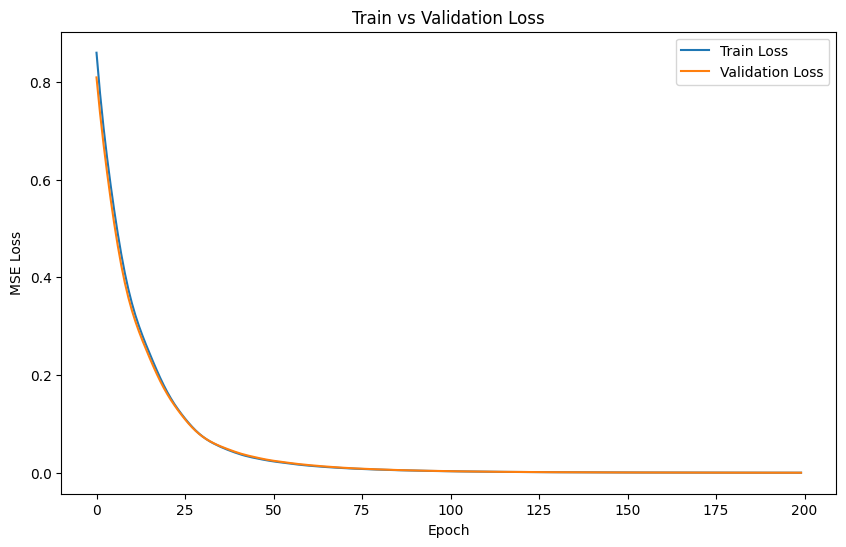

In [12]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# =====================================
# 1️⃣ Load and preprocess your dataset
# =====================================
soil_cols = [
    'ph','organic_matter','total_nitrogen','potassium','p2o5','boron','zinc',
    'sand','clay','slit','parentsoil','crop','variety'
]
fert_cols = ['UREA1','UREA2','UREA3','DAP','MOP','organic']

# Make sure df is your dataset
df = df.dropna(subset=soil_cols + fert_cols)
df = df.sample(min(4000, len(df)), random_state=42).reset_index(drop=True)

X = df[soil_cols]
y = df[fert_cols]

# Normalize features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize target fertilizers to [0,1] for stable training
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# =====================================
# 2️⃣ Neural Network for Regression
# =====================================
class FertNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256), nn.ReLU(),
            nn.Linear(256, 256), nn.ReLU(),
            nn.Linear(256, output_dim)
        )
    def forward(self, x):
        return self.net(x)

model = FertNet(X_train.shape[1], y_train.shape[1])

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# =====================================
# 3️⃣ Train the model
# =====================================
epochs = 200
train_loss_list = []
val_loss_list = []

for ep in range(1, epochs + 1):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_loss_list.append(loss.item())

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        val_loss_list.append(val_loss.item())

    if ep % 20 == 0 or ep == 1:
        print(f"Epoch {ep}/{epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# =====================================
# 4️⃣ Evaluate RMSE
# =====================================
model.eval()
with torch.no_grad():
    train_preds = model(X_train)
    val_preds = model(X_test)

# Inverse scale to original fertilizer units
train_preds_orig = scaler_y.inverse_transform(train_preds.numpy())
val_preds_orig = scaler_y.inverse_transform(val_preds.numpy())
y_train_orig = scaler_y.inverse_transform(y_train.numpy())
y_test_orig = scaler_y.inverse_transform(y_test.numpy())

train_rmse = np.sqrt(np.mean((train_preds_orig - y_train_orig) ** 2))
val_rmse = np.sqrt(np.mean((val_preds_orig - y_test_orig) ** 2))

print(f"\nFinal Train RMSE: {train_rmse:.4f}, Validation RMSE: {val_rmse:.4f}")

# =====================================
# 5️⃣ Plot Loss
# =====================================
plt.figure(figsize=(10,6))
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()


In [13]:
# import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# =========================
# 1️⃣ Prepare dataset
# =========================
soil_cols = [
    'ph','organic_matter','total_nitrogen','potassium','p2o5','boron','zinc',
    'sand','clay','slit','parentsoil','crop','variety'
]
fert_cols = ['UREA1','UREA2','UREA3','DAP','MOP']

# Example: df already loaded
df = df.dropna(subset=soil_cols + fert_cols)
df = df.sample(min(25000, len(df)), random_state=42).reset_index(drop=True)

X = df[soil_cols]
y = df[fert_cols]

# Feature & target scaling
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# =========================
# 2️⃣ Define model
# =========================
class FertNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256), nn.ReLU(),
            nn.Linear(256, 256), nn.ReLU(),
            nn.Linear(256, output_dim)
        )
    def forward(self, x):
        return self.net(x)

model = FertNet(X_train.shape[1], y_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# =========================
# 3️⃣ Train model
# =========================
epochs = 200
for ep in range(1, epochs+1):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Optional validation
    if ep % 10 == 0 or ep == 1:
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
        print(f"Epoch {ep}/{epochs}, Train Loss: {loss.item():.6f}, Val Loss: {val_loss.item():.6f}")

# Save model
torch.save(model.state_dict(), "fertilizer_model.pth")

# =========================
# 4️⃣ Production-ready prediction
# =========================
# Precompute min/max for clipping
fert_min = np.zeros(len(fert_cols))           # no negative fertilizers
fert_max = y.max().values                     # realistic max per fertilizer

def predict_fertilizer(input_features):
    """
    input_features: list or array of soil features in the order of soil_cols
    returns: array of predicted fertilizer amounts (clipped to realistic ranges)
    """
    x_scaled = scaler_X.transform([input_features])
    x_tensor = torch.tensor(x_scaled, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        y_scaled_pred = model(x_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_scaled_pred)
    # Clip to valid ranges
    y_pred_clipped = np.clip(y_pred, fert_min, fert_max)
    return y_pred_clipped.flatten()

# =========================
# 5️⃣ Test
# =========================
sample_input = X.iloc[0].values
predicted_fert = predict_fertilizer(sample_input)
print("Predicted fertilizers:", dict(zip(fert_cols, predicted_fert)))


Epoch 1/200, Train Loss: 1.002343, Val Loss: 0.871546
Epoch 10/200, Train Loss: 0.462297, Val Loss: 0.444390
Epoch 20/200, Train Loss: 0.239503, Val Loss: 0.220121
Epoch 30/200, Train Loss: 0.112262, Val Loss: 0.105318
Epoch 40/200, Train Loss: 0.051049, Val Loss: 0.047242
Epoch 50/200, Train Loss: 0.026784, Val Loss: 0.025696
Epoch 60/200, Train Loss: 0.015337, Val Loss: 0.014247
Epoch 70/200, Train Loss: 0.009210, Val Loss: 0.008380
Epoch 80/200, Train Loss: 0.005648, Val Loss: 0.004890
Epoch 90/200, Train Loss: 0.003663, Val Loss: 0.003015
Epoch 100/200, Train Loss: 0.002470, Val Loss: 0.001951
Epoch 110/200, Train Loss: 0.001726, Val Loss: 0.001309
Epoch 120/200, Train Loss: 0.001242, Val Loss: 0.000924
Epoch 130/200, Train Loss: 0.000908, Val Loss: 0.000669
Epoch 140/200, Train Loss: 0.000670, Val Loss: 0.000498
Epoch 150/200, Train Loss: 0.000504, Val Loss: 0.000372
Epoch 160/200, Train Loss: 0.000386, Val Loss: 0.000286
Epoch 170/200, Train Loss: 0.000299, Val Loss: 0.000226
Epo

c:\Users\Acer\.conda\envs\nlp-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Epoch 1/200, Train Loss: 1.029936, Val Loss: 0.879038
Epoch 10/200, Train Loss: 0.490734, Val Loss: 0.420425
Epoch 20/200, Train Loss: 0.239749, Val Loss: 0.207890
Epoch 30/200, Train Loss: 0.101824, Val Loss: 0.087729
Epoch 40/200, Train Loss: 0.046947, Val Loss: 0.040441
Epoch 50/200, Train Loss: 0.025431, Val Loss: 0.022749
Epoch 60/200, Train Loss: 0.014405, Val Loss: 0.013354
Epoch 70/200, Train Loss: 0.008468, Val Loss: 0.008264
Epoch 80/200, Train Loss: 0.005191, Val Loss: 0.005307
Epoch 90/200, Train Loss: 0.003379, Val Loss: 0.003699
Epoch 100/200, Train Loss: 0.002331, Val Loss: 0.002728
Epoch 110/200, Train Loss: 0.001685, Val Loss: 0.002078
Epoch 120/200, Train Loss: 0.001259, Val Loss: 0.001639
Epoch 130/200, Train Loss: 0.000961, Val Loss: 0.001320
Epoch 140/200, Train Loss: 0.000755, Val Loss: 0.001093
Epoch 150/200, Train Loss: 0.000600, Val Loss: 0.000912
Epoch 160/200, Train Loss: 0.000489, Val Loss: 0.000775
Epoch 170/200, Train Loss: 0.000402, Val Loss: 0.000661
Epoch 180/200, Train Loss: 0.000333, Val Loss: 0.000564
Epoch 190/200, Train Loss: 0.000278, Val Loss: 0.000482
Epoch 200/200, Train Loss: 0.000232, Val Loss: 0.000412
Predicted fertilizers: {'UREA1': 1.178892731666565, 'UREA2': 1.8103035688400269, 'UREA3': 1.811872959136963, 'DAP': 1.6326504945755005, 'MOP': 1.6773508787155151}
c:\Users\Acer\.conda\envs\nlp-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(

Epoch 1/20000, Train Loss: 0.849301, Val Loss: 0.837252
Epoch 20/20000, Train Loss: 0.211235, Val Loss: 0.182509
Epoch 40/20000, Train Loss: 0.073330, Val Loss: 0.037957
Epoch 60/20000, Train Loss: 0.042940, Val Loss: 0.016386
Epoch 80/20000, Train Loss: 0.032759, Val Loss: 0.008358
Epoch 100/20000, Train Loss: 0.025403, Val Loss: 0.005113
Epoch 120/20000, Train Loss: 0.023227, Val Loss: 0.003281
Epoch 140/20000, Train Loss: 0.021731, Val Loss: 0.002132
Epoch 160/20000, Train Loss: 0.019065, Val Loss: 0.001535
Epoch 180/20000, Train Loss: 0.016928, Val Loss: 0.001243
Epoch 200/20000, Train Loss: 0.016768, Val Loss: 0.001089
Epoch 220/20000, Train Loss: 0.016447, Val Loss: 0.000943
Epoch 240/20000, Train Loss: 0.014431, Val Loss: 0.000734
Epoch 260/20000, Train Loss: 0.014701, Val Loss: 0.000869
Epoch 280/20000, Train Loss: 0.014219, Val Loss: 0.000962
Epoch 300/20000, Train Loss: 0.013764, Val Loss: 0.000790
Epoch 320/20000, Train Loss: 0.013847, Val Loss: 0.000489
Epoch 340/20000, Tra

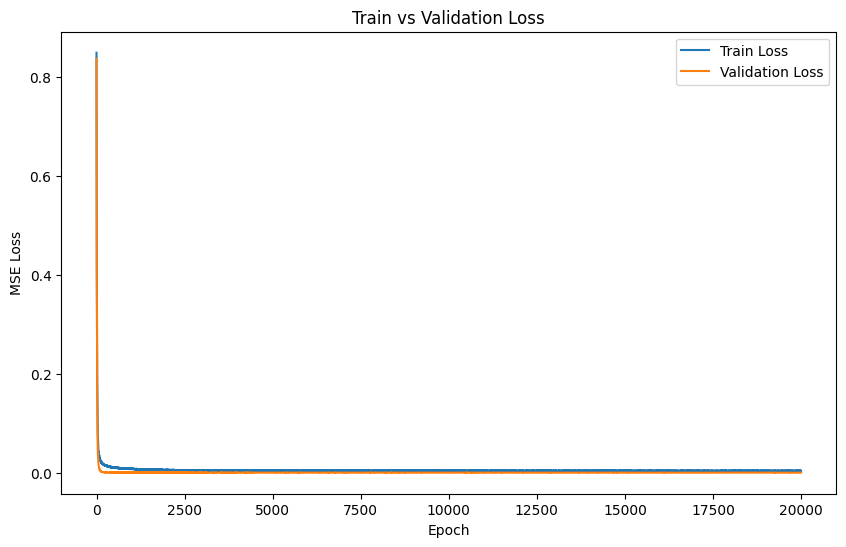

UREA1: 1.18 units ± 0.8%
UREA2: 1.81 units ± 0.4%
UREA3: 1.81 units ± 0.4%
DAP: 1.64 units ± 0.8%
MOP: 1.67 units ± 0.6%
organic: 6.00 units ± 0.0%


In [16]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# =========================
# 1️⃣ Prepare dataset
# =========================
soil_cols = [
    'ph','organic_matter','total_nitrogen','potassium','p2o5','boron','zinc',
    'sand','clay','slit','parentsoil','crop','variety'
]
fert_cols = ['UREA1','UREA2','UREA3','DAP','MOP','organic']

# Load df as your dataset
df = df.dropna(subset=soil_cols + fert_cols)
df = df.sample(min(25000, len(df)), random_state=42).reset_index(drop=True)

X = df[soil_cols]
y = df[fert_cols]

# Feature & target scaling
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Precompute min/max for clipping
fert_min = np.zeros(len(fert_cols))           # no negative fertilizers
fert_max = y.max().values                     # realistic max per fertilizer

# =========================
# 2️⃣ Define model with Dropout
# =========================
class FertNetDropout(nn.Module):
    def __init__(self, input_dim, output_dim, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256), nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, 256), nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, output_dim)
        )
    def forward(self, x):
        return self.net(x)

model = FertNetDropout(X_train.shape[1], y_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# =========================
# 3️⃣ Train the model
# =========================
epochs = 20000
train_loss_list = []
val_loss_list = []

for ep in range(1, epochs+1):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_loss_list.append(loss.item())

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        val_loss_list.append(val_loss.item())

    if ep % 20 == 0 or ep == 1:
        print(f"Epoch {ep}/{epochs}, Train Loss: {loss.item():.6f}, Val Loss: {val_loss.item():.6f}")

# Save the trained model
torch.save(model.state_dict(), "fertilizer_model_dropout.pth")

# =========================
# 4️⃣ Plot Loss
# =========================
plt.figure(figsize=(10,6))
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

# =========================
# 5️⃣ Prediction with % uncertainty
# =========================
def predict_fertilizer_with_percent_uncertainty(input_features, mc_runs=50):
    """
    Predict fertilizer amounts with Monte Carlo Dropout uncertainty (as %)
    input_features: list or array of soil features in the order of soil_cols
    mc_runs: number of forward passes for uncertainty estimation
    Returns: mean prediction and percentage uncertainty for each fertilizer
    """
    # Convert input to DataFrame to avoid sklearn warning
    x_df = pd.DataFrame([input_features], columns=soil_cols)
    x_scaled = scaler_X.transform(x_df)
    x_tensor = torch.tensor(x_scaled, dtype=torch.float32)

    # Enable dropout during inference
    model.train()
    preds = []

    for _ in range(mc_runs):
        with torch.no_grad():
            y_scaled_pred = model(x_tensor).numpy()
        y_pred = scaler_y.inverse_transform(y_scaled_pred)
        y_pred_clipped = np.clip(y_pred, fert_min, fert_max)
        preds.append(y_pred_clipped.flatten())

    preds = np.array(preds)
    pred_mean = preds.mean(axis=0)
    pred_std = preds.std(axis=0)
    
    # Convert std to percentage of predicted amount
    pred_percent_uncertainty = (pred_std / pred_mean) * 100
    return pred_mean, pred_percent_uncertainty

# =========================
# 6️⃣ Example usage
# =========================
sample_input = X.iloc[0].values
pred_mean, pred_percent = predict_fertilizer_with_percent_uncertainty(sample_input, mc_runs=50)

for f, m, p in zip(fert_cols, pred_mean, pred_percent):
    print(f"{f}: {m:.2f} units ± {p:.1f}%")


In [15]:
# 1️⃣ Extract soil features manually from your CSV row
manual_input = [
    5.69,   # ph
    4.29,   # organic_matter
    0.2,    # total_nitrogen
    232.52, # potassium
    45.23,  # p2o5
    0.64,   # boron
    2.31,   # zinc
    45.16,  # sand
    22.42,  # clay
    31.5,   # slit
    2.0,    # parentsoil (encoded, e.g., 2)
    0.0,    # crop (encoded)
    1.0     # variety (encoded)
]

# 2️⃣ Run inference
pred_mean, pred_percent = predict_fertilizer_with_percent_uncertainty(manual_input, mc_runs=50)

# 3️⃣ Display results
for f, m, p in zip(fert_cols, pred_mean, pred_percent):
    print(f"{f}: {m:.2f} units ± {p:.1f}%")


UREA1: 0.97 units ± 2.9%
UREA2: 1.81 units ± 0.9%
UREA3: 1.81 units ± 0.9%
DAP: 2.17 units ± 2.0%
MOP: 1.67 units ± 0.9%
organic: 6.00 units ± 0.0%
